In [39]:
import matplotlib.pyplot as plt

In [40]:
# data formatted as dict. Keys are model names and values are lists of [mean_iou, fps]
data = {
    'DDRNet-39': [80.0, 26.1],
    'DDRNet-23': [77.2, 35.1],
    'DDRNet-23-Slim': [75.4, 101.5],
    'PIDNet-L': [80.9, 31.1],
    'PIDNet-M': [79.9, 40.1],
    'PIDNet-S': [78.7, 93.2],
    'SEBNet-L': [81.5, 31.1],
    'SEBNet-M': [81.0, 35.4]
}

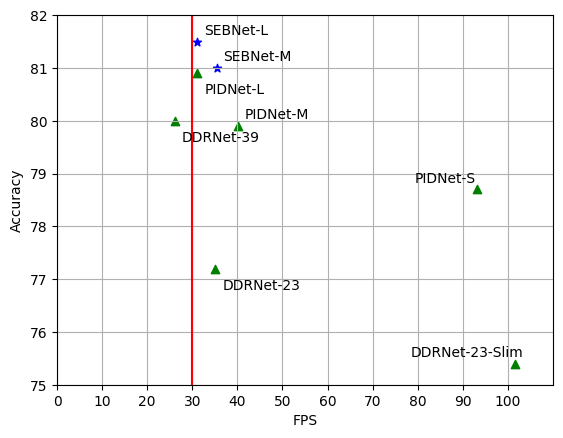

In [45]:
# Separate data for SEBNet and others
sebnet_keys = [k for k in data if 'SEBNet' in k]
other_keys = [k for k in data if 'SEBNet' not in k]

sebnet_fps = [data[k][1] for k in sebnet_keys]
sebnet_acc = [data[k][0] for k in sebnet_keys]

other_fps = [data[k][1] for k in other_keys]
other_acc = [data[k][0] for k in other_keys]

plt.figure()
plt.scatter(other_fps, other_acc, marker='^', color='green')
plt.scatter(sebnet_fps, sebnet_acc, marker='*', color='blue')

# Annotate all points
for key in other_keys:
    if key != 'PIDNet-M' and key != 'DDRNet-23-Slim' and key != 'PIDNet-S':
        plt.annotate(key, (data[key][1], data[key][0]), xytext=(5, -15), textcoords='offset points')
for key in sebnet_keys:
    plt.annotate(key, (data[key][1], data[key][0]), xytext=(5, 5), textcoords='offset points')
plt.annotate('PIDNet-S', (data['PIDNet-S'][1], data['PIDNet-S'][0]), xytext=(-45, 5), textcoords='offset points')
plt.annotate('PIDNet-M', (data['PIDNet-M'][1], data['PIDNet-M'][0]), xytext=(5, 5), textcoords='offset points')
plt.annotate('DDRNet-23-Slim', (data['DDRNet-23-Slim'][1], data['DDRNet-23-Slim'][0]), xytext=(-75, 5), textcoords='offset points')
# Draw a vertical red line on x axis at 30 fps
plt.axvline(x=30, color='red', linestyle='-')

plt.xlim(0, 110)
plt.ylim(75, 82)
plt.xticks(range(0, 110, 10))
plt.xlabel('FPS')
plt.ylabel('Accuracy')
plt.grid(True)
plt.show()